In [159]:
import fiona
import networkx as nx
import osmnx as ox
import geopandas as gp
from shapely.geometry import box

from random import random

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

In [160]:
# get all building footprints in some neighborhood
place = "Bunker Hill, Los Angeles, California"
tags = {"building": True}
gdf = ox.geometries_from_address(place, tags, dist = 400) # distance in meters
print(gdf.shape)

(105, 58)


In [161]:
'''
    Preprocessing our GeoDataFrame

        1. Simplifying building geometries
        2. Adding centroids
        x. Removing some obstacles randomly (not for prod?)
'''

# envelope : convert to rectangles, simplify: reduce edges (also see shapely/geopandas docs)
# simple = gdf['geometry'].simplify(0.5)
simple = gdf['geometry'].envelope
gdf['geometry'] = simple

# gdf = gdf.set_crs("EPSG:3035", allow_override=True)
gdf['centroid'] = gdf.centroid

gdf = gdf.sample(frac=0.4)
print(gdf.shape)


(42, 59)
<ipython-input-161-9a09e330a346>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid


In [152]:
# gdf['geometry'].to_file("test")
# gdf['geometry'].to_csv("test2.csv")

In [153]:
# fig, ax = ox.plot_footprints(gdf, figsize=(6, 6), color="blue", bgcolor = "white")

<AxesSubplot:>

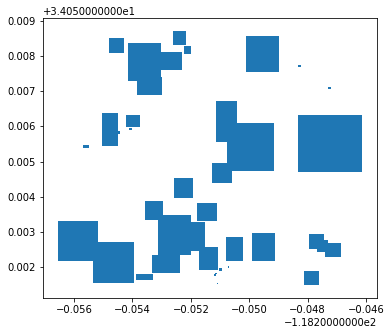

In [162]:
gdf.plot(figsize=(6, 6))

# fig = gdf.set_geometry('centroid')
# fig.plot()



In [163]:
gdf.sindex.size

42

In [164]:
'''
    Building query points, all of them being at random locations.
'''
gdf.total_bounds

array([-118.2565573,   34.0515003, -118.2461352,   34.0587115])

In [ ]:
'''
    Building TARGET.
'''